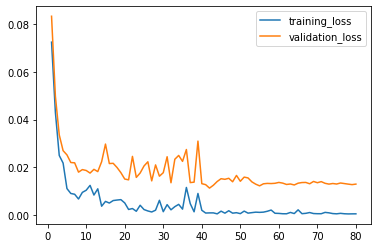

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


losses = pd.read_feather("../output/segmentation_from_gt/densenet.feather").set_index("index")

plt.plot(losses.index, losses["train_loss"], label="training_loss")
plt.plot(losses.index, losses["validation_loss"], label="validation_loss")
plt.legend()
plt.show()

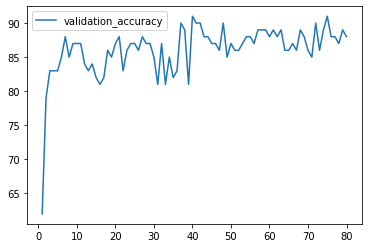

In [19]:
plt.figure()
plt.plot(losses.index, losses["validation_accuracy"], label="validation_accuracy")
plt.legend()
plt.show()

In [20]:
odd_losses = losses.loc[losses.index % 2 == 1].copy()
# Get the rank of the epoch weights according to the validation loss
odd_losses["rank_loss"] = (
    losses.loc[losses.index % 2 == 1]
    .sort_values(by="validation_loss")
    .reset_index()
    .reset_index()
    .set_index("index")["level_0"]
)
# Get the rank of the epoch weights according to the validation accuracy
odd_losses["rank_accuracy"] = (
    losses.loc[losses.index % 2 == 1]
    .sort_values(by="validation_accuracy", ascending=False)
    .reset_index()
    .reset_index()
    .set_index("index")["level_0"]
)
odd_losses["rank_sum"] = odd_losses["rank_loss"] + odd_losses["rank_accuracy"]
odd_losses.sort_values(by="rank_sum")

,train_loss,validation_loss,validation_accuracy,rank_loss,rank_accuracy,rank_sum
index,,,,,,
41,0.000869,0.012765,90,2,1,3
75,0.000545,0.013027,91,5,0,5
63,0.001125,0.013041,89,6,3,9
79,0.000527,0.012779,89,3,7,10
55,0.001154,0.012264,88,0,12,12
37,0.004809,0.013630,90,12,2,14
59,0.000773,0.013336,89,9,5,14
57,0.001610,0.013287,89,8,6,14
43,0.000935,0.012515,88,1,14,15


In [2]:
import numpy as np
import pandas as pd 

models = ["resnet", "alexnet", "vgg", "squeezenet", "densenet", "efficientnet"]
validation_losses = []
validation_accuracies = []
epoch_best_loss = []
epoch_best_accuracy = []
for model in models:
    losses = pd.read_feather(f"../output/crop_from_gt/{model}.feather").set_index("index")

    validation_losses.append(losses.loc[losses.index % 2 == 1, "validation_loss"].min())
    epoch_best_loss.append(losses.loc[losses.index % 2 == 1, "validation_loss"].idxmin())

    validation_accuracies.append(losses.loc[losses.index % 2 == 1, "validation_accuracy"].max())
    epoch_best_accuracy.append(losses.loc[losses.index % 2 == 1, "validation_accuracy"].idxmax())

    
rankings = pd.DataFrame(None, index=models, columns=["Rank sum", "Rank best loss", "Rank best accuracy", "Epoch best accuracy", "Epoch best loss"])
rankings.loc[models, "Epoch best loss"] = pd.Series(epoch_best_loss, index=models)
rankings.loc[models, "Epoch best accuracy"] = pd.Series(epoch_best_accuracy, index=models)
rankings.loc[models, "Rank best loss"] = pd.DataFrame(np.array([models, validation_losses]).T, columns=["model", "accuracy"]).sort_values(by="accuracy", ascending=True).reset_index(drop=True).reset_index().set_index("model")["index"] + 1
rankings.loc[models, "Rank best accuracy"] = pd.DataFrame(np.array([models, validation_accuracies]).T, columns=["model", "accuracy"]).sort_values(by="accuracy", ascending=False).reset_index(drop=True).reset_index().set_index("model")["index"] + 1
rankings["Rank sum"] = rankings["Rank best loss"] + rankings["Rank best accuracy"]
rankings.sort_values(by="Rank sum")

,Rank sum,Rank best loss,Rank best accuracy,Epoch best accuracy,Epoch best loss
vgg,3,2,1,37,37
resnet,5,1,4,21,17
densenet,6,3,3,21,33
efficientnet,7,5,2,43,19
alexnet,9,4,5,27,27
squeezenet,12,6,6,7,35
